<ipython-input-6-3103af95928a>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_confirmed = confirmed_df.groupby('Country/Region').sum().T.sum()
<ipython-input-6-3103af95928a>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_deaths = deaths_df.groupby('Country/Region').sum().T.sum()


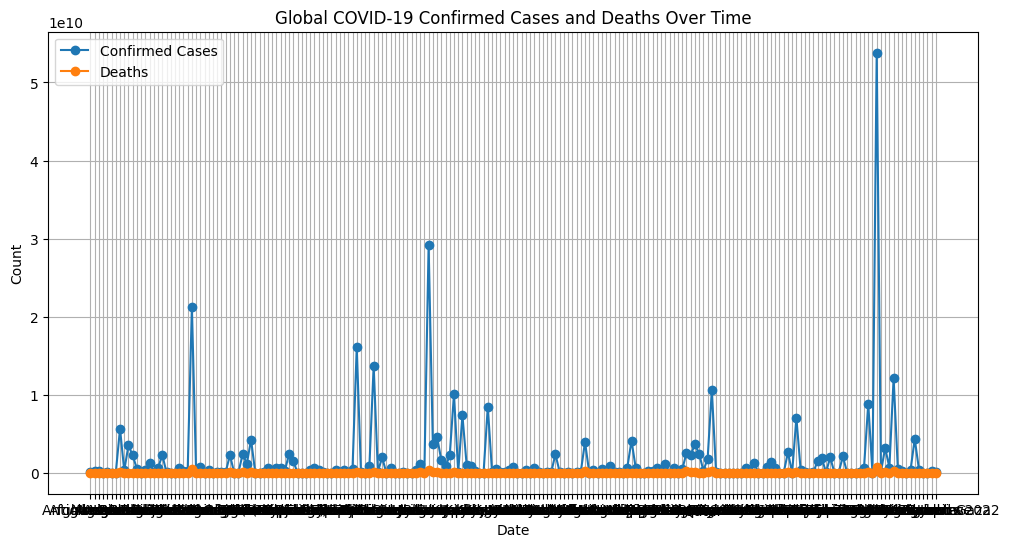

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

global_confirmed = confirmed_df.groupby('Country/Region').sum().T.sum()
global_deaths = deaths_df.groupby('Country/Region').sum().T.sum()

global_data = pd.DataFrame({'Confirmed': global_confirmed, 'Deaths': global_deaths})

plt.figure(figsize=(12, 6))
plt.plot(global_data.index, global_data['Confirmed'], label='Confirmed Cases', marker='o')
plt.plot(global_data.index, global_data['Deaths'], label='Deaths', marker='o')
plt.title('Global COVID-19 Confirmed Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

# Function to get stock data using AlphaVantage API
def get_stock_data(symbol):
    api_key = 'TC54JI2GWZOZ8I0J'
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data[['2. high', '3. low']]

# Define data URLs
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

global_confirmed = confirmed_df.groupby('Country/Region').sum().T.sum()
global_deaths = deaths_df.groupby('Country/Region').sum().T.sum()

global_data = pd.DataFrame({'Confirmed': global_confirmed, 'Deaths': global_deaths})

datewise_data = {}
for date in confirmed_df.columns[4:]:
    datewise_data[date] = pd.DataFrame({
        'Confirmed': confirmed_df.groupby('Country/Region')[date].sum(),
        'Deaths': deaths_df.groupby('Country/Region')[date].sum()
    })

saskatchewan_data = datewise_data['12/3/22']

it_stock_symbol = 'AAPL'
precious_metal_stock_symbol = 'GOLD'

it_stock_data = get_stock_data(it_stock_symbol)
precious_metal_stock_data = get_stock_data(precious_metal_stock_symbol)

global_data['IT_Stock_High'] = it_stock_data['2. high']
global_data['IT_Stock_Low'] = it_stock_data['3. low']
global_data['Precious_Metal_Stock_High'] = precious_metal_stock_data['2. high']
global_data['Precious_Metal_Stock_Low'] = precious_metal_stock_data['3. low']

# Print or display the updated dataframe
print(global_data)


<ipython-input-10-8cd5c72dcf99>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_confirmed = confirmed_df.groupby('Country/Region').sum().T.sum()
<ipython-input-10-8cd5c72dcf99>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_deaths = deaths_df.groupby('Country/Region').sum().T.sum()


                         Confirmed        Deaths  IT_Stock_High  IT_Stock_Low  \
Country/Region                                                                  
Afghanistan           1.299886e+08  5.421537e+06            NaN           NaN   
Albania               1.855627e+08  2.485441e+06            NaN           NaN   
Algeria               1.827417e+08  4.901305e+06            NaN           NaN   
Andorra               2.454757e+07  1.272340e+05            NaN           NaN   
Angola                6.002521e+07  1.231841e+06            NaN           NaN   
...                            ...           ...            ...           ...   
West Bank and Gaza    4.125438e+08  3.754776e+06            NaN           NaN   
Winter Olympics 2022  2.146183e+05  1.563116e+02            NaN           NaN   
Yemen                 7.879499e+06  1.515510e+06            NaN           NaN   
Zambia                1.959537e+08  2.631737e+06            NaN           NaN   
Zimbabwe              1.4038

<ipython-input-12-e786fa1111c4>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_confirmed = confirmed_df.groupby('Country/Region').sum().T.sum()
<ipython-input-12-e786fa1111c4>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_deaths = deaths_df.groupby('Country/Region').sum().T.sum()


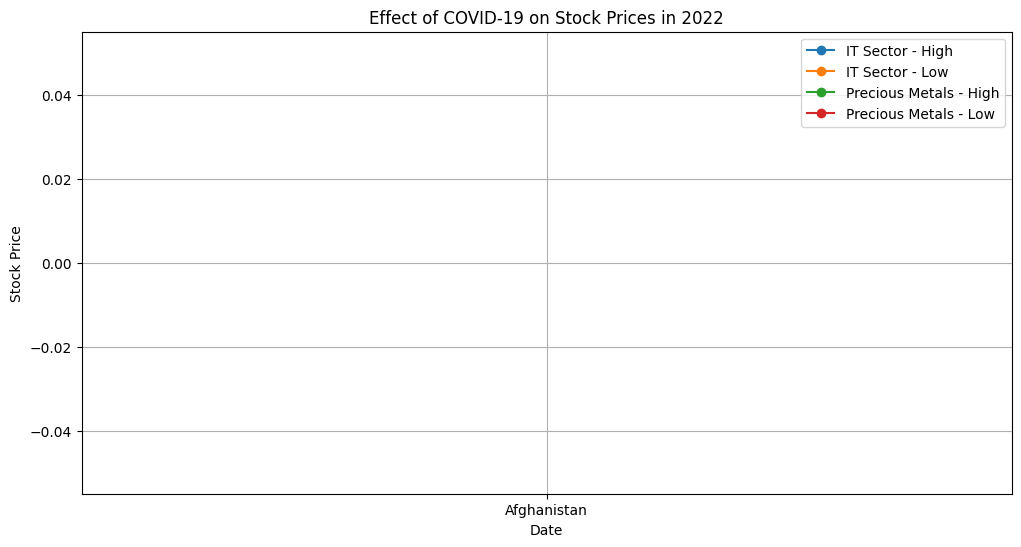

<Figure size 1200x800 with 0 Axes>

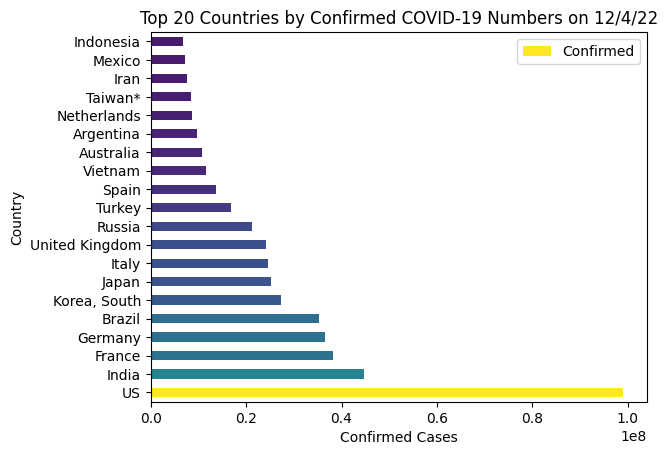

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

# Function to get stock data using AlphaVantage API
def get_stock_data(symbol):
    api_key = 'TC54JI2GWZOZ8I0J'
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data[['2. high', '3. low']]

confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

global_confirmed = confirmed_df.groupby('Country/Region').sum().T.sum()
global_deaths = deaths_df.groupby('Country/Region').sum().T.sum()

global_data = pd.DataFrame({'Confirmed': global_confirmed, 'Deaths': global_deaths})

datewise_data = {}
for date in confirmed_df.columns[4:]:
    datewise_data[date] = pd.DataFrame({
        'Confirmed': confirmed_df.groupby('Country/Region')[date].sum(),
        'Deaths': deaths_df.groupby('Country/Region')[date].sum()
    })

saskatchewan_data = datewise_data['12/4/22']

it_stock_symbol = 'AAPL'
precious_metal_stock_symbol = 'GOLD'

it_stock_data = get_stock_data(it_stock_symbol)
precious_metal_stock_data = get_stock_data(precious_metal_stock_symbol)

global_data['IT_Stock_High'] = it_stock_data['2. high']
global_data['IT_Stock_Low'] = it_stock_data['3. low']
global_data['Precious_Metal_Stock_High'] = precious_metal_stock_data['2. high']
global_data['Precious_Metal_Stock_Low'] = precious_metal_stock_data['3. low']

plt.figure(figsize=(12, 6))
plt.plot(global_data.index, global_data['IT_Stock_High'], label='IT Sector - High', marker='o')
plt.plot(global_data.index, global_data['IT_Stock_Low'], label='IT Sector - Low', marker='o')
plt.plot(global_data.index, global_data['Precious_Metal_Stock_High'], label='Precious Metals - High', marker='o')
plt.plot(global_data.index, global_data['Precious_Metal_Stock_Low'], label='Precious Metals - Low', marker='o')
plt.title('Effect of COVID-19 on Stock Prices in 2022')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

date_for_bar_chart = '12/4/22'
top_20_countries = datewise_data[date_for_bar_chart].nlargest(20, 'Confirmed')

colors = plt.cm.viridis(top_20_countries['Confirmed'] / top_20_countries['Confirmed'].max())

plt.figure(figsize=(12, 8))
top_20_countries.plot(kind='barh', y='Confirmed', color=colors)
plt.title('Top 20 Countries by Confirmed COVID-19 Numbers on ' + date_for_bar_chart)
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()
